# ExportMap Analysis Notebook
### Combined Fuzzy-Merged Dataset
---
This notebook loads, cleans, and merges your two datasets using **fuzzy matching**, then performs descriptive and prescriptive analytics.

## 1. Load & Inspect Data

Population dataset shape: (234, 17)
Countries-of-world dataset shape: (227, 20)
Merged shape: (219, 37)


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,3.2,12.13,0.22,87.65,1,46.60,20.34,0.38,0.24,0.38
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,71.2,21.09,4.42,74.49,3,15.11,5.22,232.00,188.00,579.00
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,78.1,3.22,0.25,96.53,1,17.14,4.61,101.00,0.60,298.00
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,259.5,10.00,15.00,75.00,2,22.46,3.27,NaN,NaN,NaN
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,497.2,2.22,0.00,97.78,3,8.71,6.25,NaN,NaN,NaN


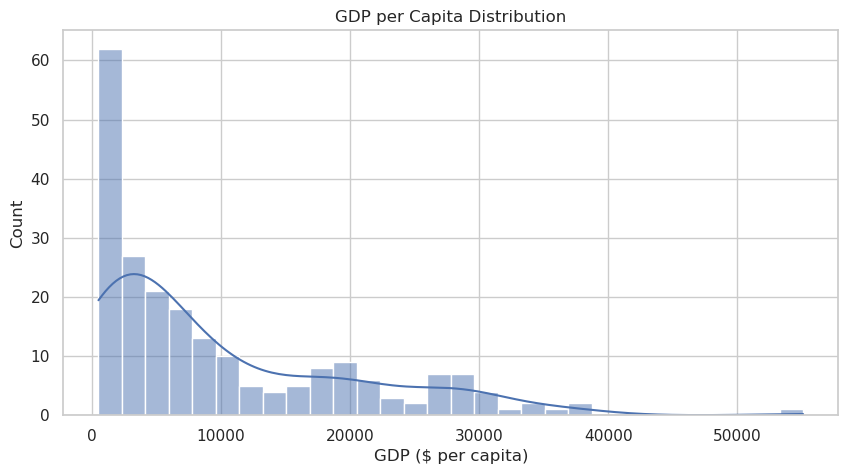

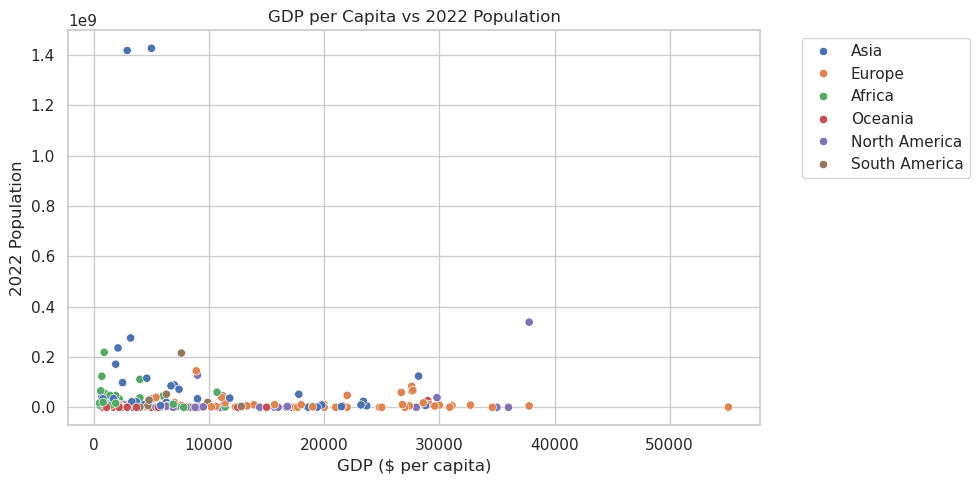

Top countries by MOS (Market Opportunity Score):


,Country/Territory,Continent,MOS
115,Luxembourg,Europe,0.720819
208,United States,North America,0.670909
22,Bermuda,North America,0.638523
38,Cayman Islands,North America,0.634447
131,Monaco,Europe,0.600460
172,San Marino,Europe,0.588615
149,Norway,Europe,0.581485
88,Iceland,Europe,0.576696
191,Switzerland,Europe,0.576025
51,Denmark,Europe,0.560448



=== Linear Regression: Predicting GDP ($ per capita) ===
R-squared on test set: 0.7958046578946203


,Feature,Coefficient
0,Literacy (%),-38.470517
1,Phones (per 1000),37.204571
2,Birthrate,-18.403894
3,Infant mortality (per 1000 births),-31.065707


Intercept: 6142.519830510538


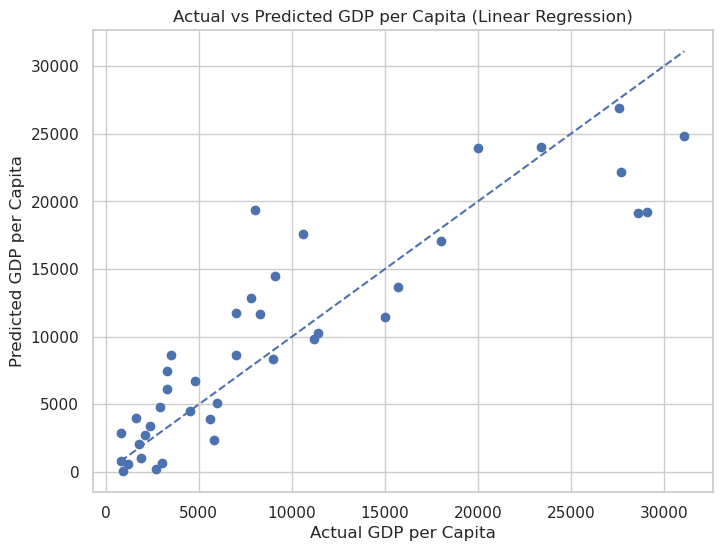

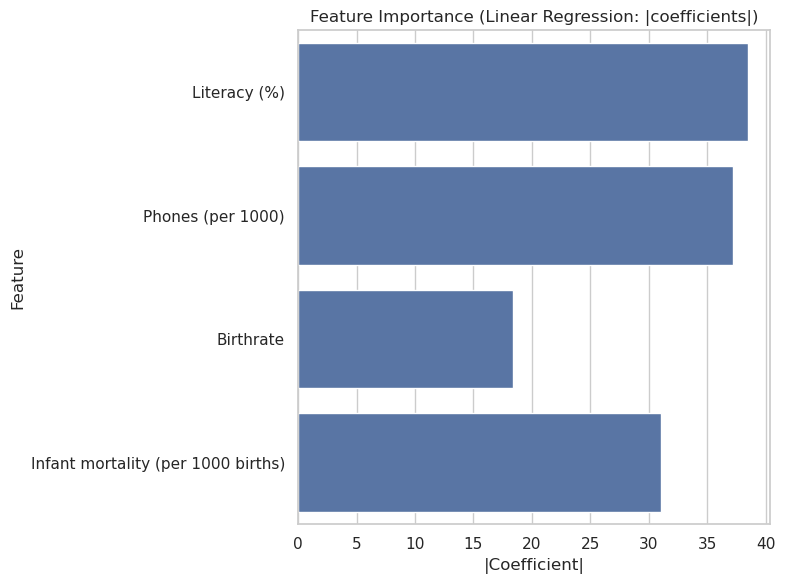


=== Logistic Regression: Predicting High Potential Market (High_MOS) ===
Accuracy on test set: 0.925

Confusion Matrix (rows = true, cols = predicted):
[[18  2]
 [ 1 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.90      0.95      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



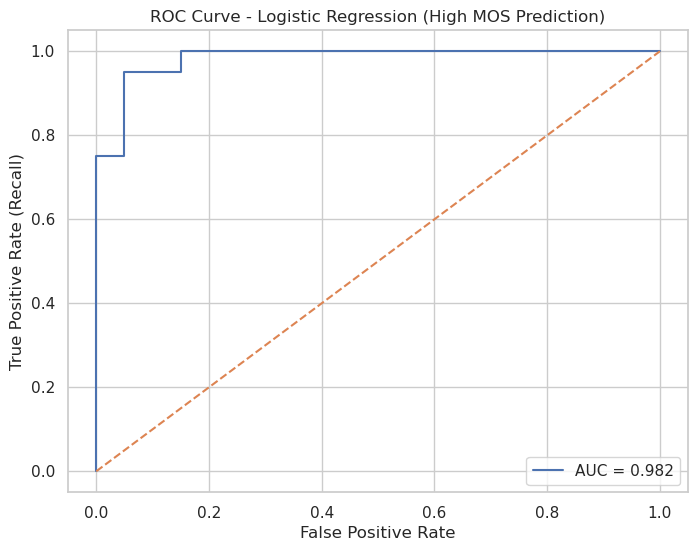


Logistic Regression Coefficients and Odds Ratios:


,Feature,Coefficient,Odds_Ratio
2,Birthrate,0.832473,2.298997
0,Literacy (%),0.376555,1.457256
1,Phones (per 1000),0.050537,1.051836
3,Infant mortality (per 1000 births),-0.073859,0.928803


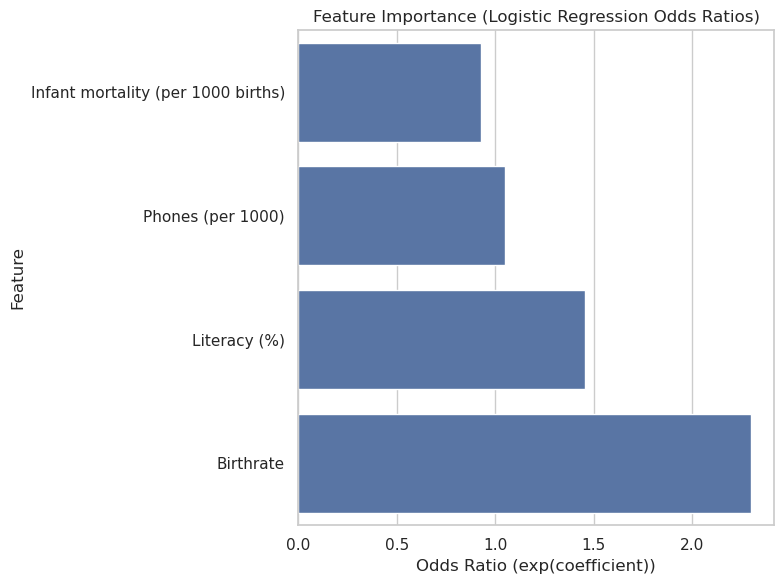


Top 10 countries by predicted probability of being High Potential (Logistic Regression):


,Country/Territory,Continent,MOS,High_MOS,High_MOS_Prob
131,Monaco,Europe,0.600460,1,1.0
208,United States,North America,0.670909,1,1.0
38,Cayman Islands,North America,0.634447,1,1.0
22,Bermuda,North America,0.638523,1,1.0
167,Saint Kitts and Nevis,North America,0.426217,1,1.0
169,Saint Pierre and Miquelon,North America,0.405000,1,1.0
190,Sweden,Europe,0.541973,1,1.0
88,Iceland,Europe,0.576696,1,1.0
172,San Marino,Europe,0.588615,1,1.0
191,Switzerland,Europe,0.576025,1,1.0



Using demographic features: ['2022 Population', 'Growth Rate']

=== Logistic Regression #2 (Demographic-Based) ===
Accuracy: 0.5454545454545454

Confusion Matrix:
[[24  0]
 [20  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        24
           1       0.00      0.00      0.00        20

    accuracy                           0.55        44
   macro avg       0.27      0.50      0.35        44
weighted avg       0.30      0.55      0.39        44


Top 10 countries by demographic-based probability:


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Country/Territory,MOS,High_MOS_Prob_Demo
133,Montserrat,NaN,0.499994
169,Saint Pierre and Miquelon,0.405000,0.499992
203,Tuvalu,NaN,0.499985
214,Wallis and Futuna,NaN,0.499985
137,Nauru,NaN,0.499983
6,Anguilla,0.367578,0.499979
45,Cook Islands,0.339759,0.499978
152,Palau,0.355010,0.499976
28,British Virgin Islands,0.440893,0.499959
29,British Virgin Islands,NaN,0.499959



[INFO] shap library not installed. Skipping SHAP explainability section.

Top 10 countries by Export Readiness Index:


,Country/Territory,Continent,MOS,Export_Readiness_Index
131,Monaco,Europe,0.600460,0.847538
22,Bermuda,North America,0.638523,0.830289
38,Cayman Islands,North America,0.634447,0.824203
208,United States,North America,0.670909,0.808416
115,Luxembourg,Europe,0.720819,0.808021
172,San Marino,Europe,0.588615,0.765981
191,Switzerland,Europe,0.576025,0.750719
88,Iceland,Europe,0.576696,0.745020
190,Sweden,Europe,0.541973,0.736248
51,Denmark,Europe,0.560448,0.726117


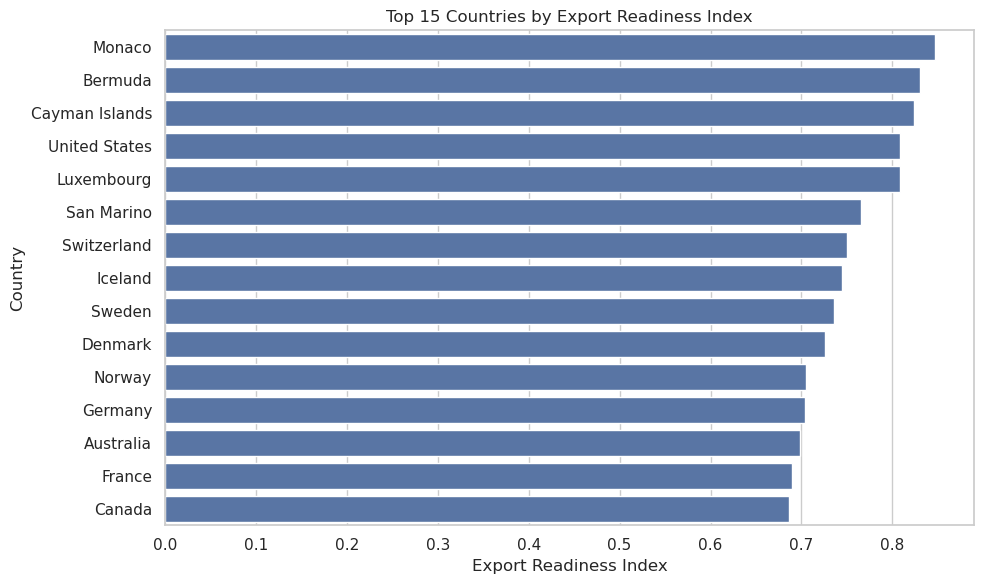


Cluster sizes:
Market_Cluster
1.0    100
2.0     64
0.0     35
NaN     20
Name: count, dtype: int64

Sample of countries with their cluster assignment:


,Country/Territory,Continent,MOS,Export_Readiness_Index,Market_Cluster
115,Luxembourg,Europe,0.720819,0.808021,0.0
208,United States,North America,0.670909,0.808416,0.0
22,Bermuda,North America,0.638523,0.830289,0.0
38,Cayman Islands,North America,0.634447,0.824203,0.0
131,Monaco,Europe,0.600460,0.847538,0.0
172,San Marino,Europe,0.588615,0.765981,0.0
149,Norway,Europe,0.581485,0.705565,0.0
88,Iceland,Europe,0.576696,0.745020,0.0
191,Switzerland,Europe,0.576025,0.750719,0.0
51,Denmark,Europe,0.560448,0.726117,0.0


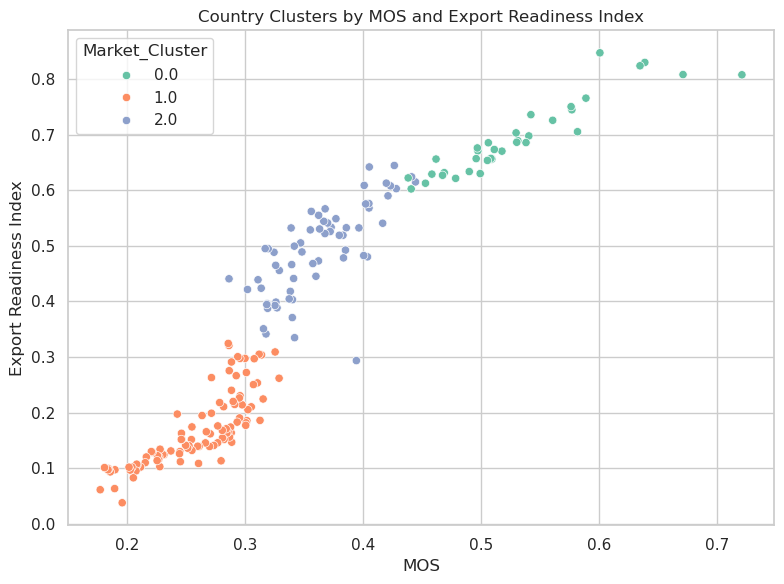


[INFO] plotly not installed. Skipping interactive map section.

Final merged dataset with MOS, models, and indices saved as: /home/jovyan/MSBA/MGTA452/collecting project/combined_exportmap_dataset.csv


In [4]:
# =========================================================
# 0. IMPORTS
# =========================================================

import pandas as pd
import numpy as np

from rapidfuzz import process, fuzz

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)
from sklearn.cluster import KMeans

# Optional libraries (graceful fallback if missing)
try:
    import shap

    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

try:
    import plotly.express as px

    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False

# To display tables nicely if running in a notebook
try:
    from IPython.display import display
except ImportError:

    def display(x):
        print(x)


# =========================================================
# 1. LOAD DATA
# =========================================================

pop_path = "/home/jovyan/MSBA/MGTA452/collecting project/world_population.csv"
cw_path = "/home/jovyan/MSBA/MGTA452/collecting project/countries of the world.csv"

pop = pd.read_csv(pop_path)
cw = pd.read_csv(cw_path)

print("Population dataset shape:", pop.shape)
print("Countries-of-world dataset shape:", cw.shape)


# =========================================================
# 2. CLEAN COUNTRIES-OF-WORLD NUMERIC COLUMNS
# =========================================================

# Replace commas with dots so numeric conversion works
for col in cw.columns:
    cw[col] = cw[col].astype(str).str.replace(",", ".", regex=False)

numeric_cols = [
    "Population",
    "Area (sq. mi.)",
    "Pop. Density (per sq. mi.)",
    "GDP ($ per capita)",
    "Literacy (%)",
    "Phones (per 1000)",
    "Arable (%)",
    "Crops (%)",
    "Other (%)",
    "Birthrate",
    "Deathrate",
    "Net migration",
    "Infant mortality (per 1000 births)",
    "Agriculture",
    "Industry",
    "Service",
]

for c in numeric_cols:
    if c in cw.columns:
        cw[c] = pd.to_numeric(cw[c], errors="coerce")


# =========================================================
# 3. FUZZY MERGE BETWEEN POPULATION & COUNTRIES-OF-WORLD
# =========================================================


def match_country(name, choices):
    if pd.isna(name):
        return None
    match, score, _ = process.extractOne(name, choices, scorer=fuzz.WRatio)
    return match if score > 80 else None  # only keep strong matches


cw["match_country"] = cw["Country"].apply(
    lambda x: match_country(x, pop["Country/Territory"].tolist())
)

merged = pd.merge(
    pop, cw, left_on="Country/Territory", right_on="match_country", how="inner"
)

merged = merged.drop(columns=["match_country"])
print("Merged shape:", merged.shape)
display(merged.head())


# =========================================================
# 4. DESCRIPTIVE ANALYTICS / EXPLORATORY PLOTS
# =========================================================

sns.set(style="whitegrid")

# GDP Distribution
plt.figure(figsize=(10, 5))
sns.histplot(merged["GDP ($ per capita)"], bins=30, kde=True)
plt.title("GDP per Capita Distribution")
plt.xlabel("GDP ($ per capita)")
plt.ylabel("Count")
plt.show()

# GDP vs Population by Continent
plt.figure(figsize=(10, 5))
if "Continent" in merged.columns:
    sns.scatterplot(
        data=merged, x="GDP ($ per capita)", y="2022 Population", hue="Continent"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
else:
    sns.scatterplot(data=merged, x="GDP ($ per capita)", y="2022 Population")
plt.title("GDP per Capita vs 2022 Population")
plt.xlabel("GDP ($ per capita)")
plt.ylabel("2022 Population")
plt.tight_layout()
plt.show()


# =========================================================
# 5. PRESCRIPTIVE MODEL: MARKET OPPORTUNITY SCORE (MOS)
# =========================================================

mos_features = ["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Birthrate"]
for f in mos_features:
    if f not in merged.columns:
        raise ValueError(f"Missing required MOS feature: {f}")

scaler = MinMaxScaler()
merged[[f + "_scaled" for f in mos_features]] = scaler.fit_transform(
    merged[mos_features]
)

# Weighted score (you can adjust weights)
merged["MOS"] = (
    0.4 * merged["GDP ($ per capita)_scaled"]
    + 0.2 * merged["Literacy (%)_scaled"]
    + 0.2 * merged["Phones (per 1000)_scaled"]
    + 0.2 * merged["Birthrate_scaled"]
)

merged = merged.sort_values("MOS", ascending=False)

print("Top countries by MOS (Market Opportunity Score):")
display(merged[["Country/Territory", "Continent", "MOS"]].head(10))


# =========================================================
# 6. PREDICTIVE MODEL 1: LINEAR REGRESSION (GDP PREDICTION)
# =========================================================

lin_features = [
    "Literacy (%)",
    "Phones (per 1000)",
    "Birthrate",
    "Infant mortality (per 1000 births)",
]

X_lin = merged[lin_features].copy()
y_lin = merged["GDP ($ per capita)"].copy()

mask_lin = X_lin.notna().all(axis=1) & y_lin.notna()
X_lin = X_lin[mask_lin]
y_lin = y_lin[mask_lin]

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

y_pred_lin = lin_reg.predict(X_test_lin)
r2 = r2_score(y_test_lin, y_pred_lin)

print("\n=== Linear Regression: Predicting GDP ($ per capita) ===")
print("R-squared on test set:", r2)

lin_coef_table = pd.DataFrame({"Feature": lin_features, "Coefficient": lin_reg.coef_})
display(lin_coef_table)
print("Intercept:", lin_reg.intercept_)


# 6.A. Actual vs Predicted GDP Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_lin, y_pred_lin)
plt.plot(
    [y_test_lin.min(), y_test_lin.max()],
    [y_test_lin.min(), y_test_lin.max()],
    linestyle="--",
)
plt.xlabel("Actual GDP per Capita")
plt.ylabel("Predicted GDP per Capita")
plt.title("Actual vs Predicted GDP per Capita (Linear Regression)")
plt.grid(True)
plt.show()

# 6.B. Feature Importance (Linear Regression) - absolute coefficients
plt.figure(figsize=(8, 6))
coef_abs = np.abs(lin_reg.coef_)
sns.barplot(x=coef_abs, y=lin_features, orient="h")
plt.title("Feature Importance (Linear Regression: |coefficients|)")
plt.xlabel("|Coefficient|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# =========================================================
# 7. PREDICTIVE MODEL 2: LOGISTIC REGRESSION (HIGH MOS)
# =========================================================

# Create binary label: High_MOS (1 if MOS >= median, else 0)
median_mos = merged["MOS"].median()
merged["High_MOS"] = (merged["MOS"] >= median_mos).astype(int)

log_features = lin_features  # reuse same features as linear model

X_log = merged[log_features].copy()
y_log = merged["High_MOS"].copy()

mask_log = X_log.notna().all(axis=1)
X_log = X_log[mask_log]
y_log = y_log[mask_log]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_log, y_train_log)

y_pred_log = log_reg.predict(X_test_log)
y_prob_log = log_reg.predict_proba(X_test_log)[:, 1]

acc = accuracy_score(y_test_log, y_pred_log)
cm = confusion_matrix(y_test_log, y_pred_log)

print("\n=== Logistic Regression: Predicting High Potential Market (High_MOS) ===")
print("Accuracy on test set:", acc)
print("\nConfusion Matrix (rows = true, cols = predicted):")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_log, y_pred_log))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression (High MOS Prediction)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Feature importance (logistic coefficients -> odds ratios)
log_odds = pd.DataFrame(
    {
        "Feature": log_features,
        "Coefficient": log_reg.coef_[0],
    }
)
log_odds["Odds_Ratio"] = np.exp(log_odds["Coefficient"])

print("\nLogistic Regression Coefficients and Odds Ratios:")
display(log_odds.sort_values("Odds_Ratio", ascending=False))

plt.figure(figsize=(8, 6))
sns.barplot(
    data=log_odds.sort_values("Odds_Ratio", ascending=True),
    x="Odds_Ratio",
    y="Feature",
    orient="h",
)
plt.title("Feature Importance (Logistic Regression Odds Ratios)")
plt.xlabel("Odds Ratio (exp(coefficient))")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Fit logistic regression on all available data and store probabilities
log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_log, y_log)

merged.loc[mask_log, "High_MOS_Prob"] = log_reg_full.predict_proba(X_log)[:, 1]

print(
    "\nTop 10 countries by predicted probability of being High Potential (Logistic Regression):"
)
display(
    merged[["Country/Territory", "Continent", "MOS", "High_MOS", "High_MOS_Prob"]]
    .sort_values("High_MOS_Prob", ascending=False)
    .head(10)
)


# =========================================================
# 8. PREDICTIVE MODEL 3: LOGISTIC REGRESSION (DEMOGRAPHICS)
# =========================================================

demo_features = ["2022 Population", "Growth Rate", "Urban Pop %", "Density (P/Km²)"]

demo_features_cleaned = [f for f in demo_features if f in merged.columns]
print("\nUsing demographic features:", demo_features_cleaned)

X2 = merged[demo_features_cleaned]
y2 = merged["High_MOS"]

mask2 = X2.notna().all(axis=1)
X2 = X2[mask2]
y2 = y2[mask2]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

log2 = LogisticRegression(max_iter=1000)
log2.fit(X2_train, y2_train)

y2_pred = log2.predict(X2_test)
y2_prob = log2.predict_proba(X2_test)[:, 1]

print("\n=== Logistic Regression #2 (Demographic-Based) ===")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))

# Save probabilities to dataframe
merged.loc[mask2, "High_MOS_Prob_Demo"] = log2.predict_proba(X2)[:, 1]

print("\nTop 10 countries by demographic-based probability:")
display(
    merged[["Country/Territory", "MOS", "High_MOS_Prob_Demo"]]
    .sort_values("High_MOS_Prob_Demo", ascending=False)
    .head(10)
)


# =========================================================
# 9. SHAP EXPLAINABILITY (if shap is installed)
# =========================================================

if SHAP_AVAILABLE:
    print("\n=== SHAP EXPLAINABILITY FOR LOGISTIC REGRESSION (ECONOMIC FEATURES) ===")
    # Use a small background sample for speed
    background = X_train_log.sample(min(50, len(X_train_log)), random_state=42)
    explainer = shap.LinearExplainer(
        log_reg, background, feature_perturbation="interventional"
    )
    shap_values = explainer.shap_values(X_test_log)

    # Summary plot (may open in a new window depending on environment)
    shap.summary_plot(shap_values, X_test_log, show=False)
    plt.title("SHAP Summary Plot - Logistic Regression (High MOS)")
    plt.show()
else:
    print("\n[INFO] shap library not installed. Skipping SHAP explainability section.")


# =========================================================
# 10. EXPORT READINESS INDEX (COMBINED SCORE)
# =========================================================

# Combine MOS, logistic probabilities, and GDP prediction into one index.
# Normalize components between 0 and 1, then average with weights.

components = pd.DataFrame(index=merged.index)

components["MOS_norm"] = (merged["MOS"] - merged["MOS"].min()) / (
    merged["MOS"].max() - merged["MOS"].min()
)

# For GDP, use predicted GDP on all countries where lin features exist
# Fit model on all data (X_lin, y_lin) we used above
lin_reg_full = LinearRegression()
lin_reg_full.fit(X_lin, y_lin)

# Make predictions for all rows where features available
all_mask_lin = merged[lin_features].notna().all(axis=1)
gdp_pred_all = pd.Series(index=merged.index, dtype=float)
gdp_pred_all[all_mask_lin] = lin_reg_full.predict(
    merged.loc[all_mask_lin, lin_features]
)

components["GDP_Pred"] = gdp_pred_all
components["GDP_Pred_norm"] = (
    components["GDP_Pred"] - components["GDP_Pred"].min()
) / (components["GDP_Pred"].max() - components["GDP_Pred"].min())

# Logistic probabilities already between 0 and 1 (may have NaNs)
components["High_MOS_Prob"] = merged["High_MOS_Prob"]
components["High_MOS_Prob_Demo"] = merged["High_MOS_Prob_Demo"]

# Replace NaNs with column means for combining
components = components.apply(lambda col: col.fillna(col.mean()))

# Define Export Readiness Index as weighted average
merged["Export_Readiness_Index"] = (
    0.35 * components["MOS_norm"]
    + 0.25 * components["GDP_Pred_norm"]
    + 0.25 * components["High_MOS_Prob"]
    + 0.15 * components["High_MOS_Prob_Demo"]
)

print("\nTop 10 countries by Export Readiness Index:")
display(
    merged[["Country/Territory", "Continent", "MOS", "Export_Readiness_Index"]]
    .sort_values("Export_Readiness_Index", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged.sort_values("Export_Readiness_Index", ascending=False).head(15),
    x="Export_Readiness_Index",
    y="Country/Territory",
    orient="h",
)
plt.title("Top 15 Countries by Export Readiness Index")
plt.xlabel("Export Readiness Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# =========================================================
# 11. CLUSTERING: GROUP COUNTRIES INTO MARKET SEGMENTS
# =========================================================

cluster_features = [
    "MOS",
    "Export_Readiness_Index",
    "GDP ($ per capita)",
    "2022 Population",
]

cluster_df = merged[cluster_features].copy()
cluster_mask = cluster_df.notna().all(axis=1)
cluster_df = cluster_df[cluster_mask]

cluster_scaler = MinMaxScaler()
cluster_scaled = cluster_scaler.fit_transform(cluster_df)

# Choose number of clusters (e.g., 3 segments)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(cluster_scaled)

merged.loc[cluster_mask, "Market_Cluster"] = clusters

print("\nCluster sizes:")
print(merged["Market_Cluster"].value_counts(dropna=False))

print("\nSample of countries with their cluster assignment:")
display(
    merged[
        [
            "Country/Territory",
            "Continent",
            "MOS",
            "Export_Readiness_Index",
            "Market_Cluster",
        ]
    ].head(20)
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged[cluster_mask],
    x="MOS",
    y="Export_Readiness_Index",
    hue="Market_Cluster",
    palette="Set2",
)
plt.title("Country Clusters by MOS and Export Readiness Index")
plt.xlabel("MOS")
plt.ylabel("Export Readiness Index")
plt.tight_layout()
plt.show()


# =========================================================
# 12. OPTIONAL: INTERACTIVE MAP (IF PLOTLY INSTALLED)
# =========================================================

if PLOTLY_AVAILABLE:
    print("\n=== Plotly Choropleth Map of Export Readiness Index ===")
    map_df = merged.copy()
    # Plotly can often recognize country names directly
    fig = px.choropleth(
        map_df,
        locations="Country/Territory",
        locationmode="country names",
        color="Export_Readiness_Index",
        hover_name="Country/Territory",
        color_continuous_scale="Viridis",
        title="Export Readiness Index by Country",
    )
    fig.show()
else:
    print("\n[INFO] plotly not installed. Skipping interactive map section.")


# =========================================================
# 13. EXPORT FINAL DATASET
# =========================================================

output_path = "/home/jovyan/MSBA/MGTA452/collecting project/combined_exportmap_dataset.csv"
merged.to_csv(output_path, index=False)
print(f"\nFinal merged dataset with MOS, models, and indices saved as: {output_path}")


In [5]:
# =========================================================
# FINAL PREDICTIVE MODELING
# Two Real Models:
# A: Predict GDP per Capita (Regression)
# E: Predict Growth Rate (Regression)
# =========================================================

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# ----------------------------
# MODEL A: Predict GDP per Capita
# ----------------------------

# Features available in merged dataset from countries-of-world.csv
gdp_features = [
    "Literacy (%)",
    "Phones (per 1000)",
    "Birthrate",
    "Infant mortality (per 1000 births)"
]

gdp_df = merged[gdp_features + ["GDP ($ per capita)"]].dropna()

X_gdp = gdp_df[gdp_features]
y_gdp = gdp_df["GDP ($ per capita)"]

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X_gdp, y_gdp, test_size=0.2, random_state=42
)

gdp_model = LinearRegression()
gdp_model.fit(X_train_A, y_train_A)

y_pred_A = gdp_model.predict(X_test_A)

print("\n=== MODEL A: GDP Prediction ===")
print("R squared:", r2_score(y_test_A, y_pred_A))
print("MAE:", mean_absolute_error(y_test_A, y_pred_A))

coef_A = pd.DataFrame({
    "Feature": gdp_features,
    "Coefficient": gdp_model.coef_
})
display(coef_A)


# ----------------------------
# MODEL E: Predict Growth Rate
# ----------------------------

growth_features = [
    "2022 Population",
    "Area (km²)",
    "Density (per km²)",
    "World Population Percentage"
]

growth_df = merged[growth_features + ["Growth Rate"]].dropna()

X_growth = growth_df[growth_features]
y_growth = growth_df["Growth Rate"]

X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(
    X_growth, y_growth, test_size=0.2, random_state=42
)

growth_model = LinearRegression()
growth_model.fit(X_train_E, y_train_E)

y_pred_E = growth_model.predict(X_test_E)

print("\n=== MODEL E: Growth Rate Prediction ===")
print("R squared:", r2_score(y_test_E, y_pred_E))
print("MAE:", mean_absolute_error(y_test_E, y_pred_E))

coef_E = pd.DataFrame({
    "Feature": growth_features,
    "Coefficient": growth_model.coef_
})
display(coef_E)


=== MODEL A: GDP Prediction ===
R squared: 0.7958046578946203
MAE: 3008.3897620924736


,Feature,Coefficient
0,Literacy (%),-38.470517
1,Phones (per 1000),37.204571
2,Birthrate,-18.403894
3,Infant mortality (per 1000 births),-31.065707



=== MODEL E: Growth Rate Prediction ===
R squared: -0.043675636936013174
MAE: 0.009424209026958506


,Feature,Coefficient
0,2022 Population,3.456964e-09
1,Area (km²),-2.268092e-10
2,Density (per km²),-3.919274e-07
3,World Population Percentage,-2.758466e-01
